# Importing Libraries and Dataset

In [21]:
import numpy as np 
import pandas as pd 

In [22]:
dataset = pd.concat( 
    map(pd.read_csv, ['train_dataset.csv', 'test_dataset.csv']), ignore_index=True) 
print(dataset)

                                           url  label                  source  \
0           irs-profilepaymentservice.com/home      1               phishtank   
1                             cpuggsukabumi.id      0        majestic_million   
2          members.tripod.com/~don_rc/ring.htm      0  data_clean_test_mendel   
3        optuswebmailadminprovider.weebly.com/      1               phishtank   
4                                 topoz.com.pl      0            dmoz_harvard   
...                                        ...    ...                     ...   
8411056  2020migrationportal.securechkout.com/      1               phishtank   
8411057                     ritmicamelilla.com      0            dmoz_harvard   
8411058         macsaeerd.lzvsi5.icu/page1.php      1               phishtank   
8411059                   .kasamilemaltese.com      0            dmoz_harvard   
8411060                              indexa.fr      0              alexatop1m   

         url_has_login  url

In [24]:
dataset.drop(dataset.iloc[:, 2:36], inplace=True, axis=1)
dataset.head()

,url,label
0,irs-profilepaymentservice.com/home,1
1,cpuggsukabumi.id,0
2,members.tripod.com/~don_rc/ring.htm,0
3,optuswebmailadminprovider.weebly.com/,1
4,topoz.com.pl,0


In [25]:
dataset.to_csv('train_dataset_combined.csv', encoding='utf-8', index=False)

In [33]:
dataset = pd.read_csv("train_dataset_combined.csv")

# Step 1: Data Cleaning and Pre-processing

In [34]:
dataset.head()

,url,label
0,irs-profilepaymentservice.com/home,1
1,cpuggsukabumi.id,0
2,members.tripod.com/~don_rc/ring.htm,0
3,optuswebmailadminprovider.weebly.com/,1
4,topoz.com.pl,0


In [35]:
dataset.tail()

,url,label
8411056,2020migrationportal.securechkout.com/,1
8411057,ritmicamelilla.com,0
8411058,macsaeerd.lzvsi5.icu/page1.php,1
8411059,.kasamilemaltese.com,0
8411060,indexa.fr,0


In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8411061 entries, 0 to 8411060
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   url     object
 1   label   int64 
dtypes: int64(1), object(1)
memory usage: 128.3+ MB


In [37]:
print("Dataset shape:", dataset.shape)

Dataset shape: (8411061, 2)


In [38]:
dataset.keys()

Index(['url', 'label'], dtype='object')

In [39]:
dataset['label'].value_counts()

label
0    6603969
1    1807092
Name: count, dtype: int64

In [40]:
dataset['url'].value_counts()

url
irs-profilepaymentservice.com/home            1
faceincontri.com                              1
solitudemountain.com                          1
karinklee.saar.de                             1
station-v.com/animation/rabbit/index1.html    1
                                             ..
www2.aenoaeen.icu/                            1
imdb.com/name/nm0000675/                      1
faceoook-page3028847.com                      1
titansystems.com                              1
indexa.fr                                     1
Name: count, Length: 8411061, dtype: int64

In [41]:
n_samples, n_features = dataset.shape
print('Number of samples:', n_samples)
print('Number of features:', n_features)

Number of samples: 8411061
Number of features: 2


In [42]:
dataset.isnull().sum()

url      0
label    0
dtype: int64

In [43]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
dataset["class_url"] = lb_make.fit_transform(dataset["label"])
print(dataset["class_url"].value_counts())
print(dataset["label"].value_counts())

class_url
0    6603969
1    1807092
Name: count, dtype: int64
label
0    6603969
1    1807092
Name: count, dtype: int64


In [45]:
print(dataset)

                                           url  label  class_url
0           irs-profilepaymentservice.com/home      1          1
1                             cpuggsukabumi.id      0          0
2          members.tripod.com/~don_rc/ring.htm      0          0
3        optuswebmailadminprovider.weebly.com/      1          1
4                                 topoz.com.pl      0          0
...                                        ...    ...        ...
8411056  2020migrationportal.securechkout.com/      1          1
8411057                     ritmicamelilla.com      0          0
8411058         macsaeerd.lzvsi5.icu/page1.php      1          1
8411059                   .kasamilemaltese.com      0          0
8411060                              indexa.fr      0          0

[8411061 rows x 3 columns]


# Step 2: Feature Engineering

In [47]:
dataset['url'] = dataset['url'].replace('www.', '', regex=True)
print(dataset)

                                           url  label  class_url
0           irs-profilepaymentservice.com/home      1          1
1                             cpuggsukabumi.id      0          0
2          members.tripod.com/~don_rc/ring.htm      0          0
3        optuswebmailadminprovider.weebly.com/      1          1
4                                 topoz.com.pl      0          0
...                                        ...    ...        ...
8411056  2020migrationportal.securechkout.com/      1          1
8411057                     ritmicamelilla.com      0          0
8411058         macsaeerd.lzvsi5.icu/page1.php      1          1
8411059                   .kasamilemaltese.com      0          0
8411060                              indexa.fr      0          0

[8411061 rows x 3 columns]


In [48]:
dataset['url_len'] = dataset['url'].apply(lambda x: len(str(x)))

dataset

,url,label,class_url,url_len
0,irs-profilepaymentservice.com/home,1,1,34
1,cpuggsukabumi.id,0,0,16
2,members.tripod.com/~don_rc/ring.htm,0,0,35
3,optuswebmailadminprovider.weebly.com/,1,1,37
4,topoz.com.pl,0,0,12
...,...,...,...,...
8411056,2020migrationportal.securechkout.com/,1,1,37
8411057,ritmicamelilla.com,0,0,18
8411058,macsaeerd.lzvsi5.icu/page1.php,1,1,30
8411059,.kasamilemaltese.com,0,0,20


In [50]:
from tld import get_tld

def process_tld(url):
    """
    Extracts the top-level domain (TLD) from the given URL.

    Parameters:
    url (str): The URL from which to extract the top-level domain.

    Returns:
    str or None: The extracted top-level domain if successful, None otherwise.
    """
    try:
        res = get_tld(url, as_object=True, fail_silently=False, fix_protocol=True)
        domain = res.parsed_url.netloc
    except:
        domain = None
    return domain

dataset['domain'] = dataset['url'].apply(lambda i: process_tld(i))

dataset


,url,label,class_url,url_len,domain
0,irs-profilepaymentservice.com/home,1,1,34,irs-profilepaymentservice.com
1,cpuggsukabumi.id,0,0,16,cpuggsukabumi.id
2,members.tripod.com/~don_rc/ring.htm,0,0,35,members.tripod.com
3,optuswebmailadminprovider.weebly.com/,1,1,37,optuswebmailadminprovider.weebly.com
4,topoz.com.pl,0,0,12,topoz.com.pl
...,...,...,...,...,...
8411056,2020migrationportal.securechkout.com/,1,1,37,2020migrationportal.securechkout.com
8411057,ritmicamelilla.com,0,0,18,ritmicamelilla.com
8411058,macsaeerd.lzvsi5.icu/page1.php,1,1,30,macsaeerd.lzvsi5.icu
8411059,.kasamilemaltese.com,0,0,20,.kasamilemaltese.com


In [51]:
from urllib.parse import urlparse
import re

def abnormal_url(url):
    """
    Checks if the given URL contains the hostname within it.

    Parameters:
    url (str): The URL to be checked.

    Returns:
    int: Returns 1 if the hostname is found within the URL, 0 otherwise.
    """
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    
    match = re.search(hostname, url)
    
    if match:
        return 1
    else:
        return 0
dataset['abnormal_url'] = dataset['url'].apply(lambda i: abnormal_url(i))
dataset


,url,label,class_url,url_len,domain,abnormal_url
0,irs-profilepaymentservice.com/home,1,1,34,irs-profilepaymentservice.com,0
1,cpuggsukabumi.id,0,0,16,cpuggsukabumi.id,0
2,members.tripod.com/~don_rc/ring.htm,0,0,35,members.tripod.com,0
3,optuswebmailadminprovider.weebly.com/,1,1,37,optuswebmailadminprovider.weebly.com,0
4,topoz.com.pl,0,0,12,topoz.com.pl,0
...,...,...,...,...,...,...
8411056,2020migrationportal.securechkout.com/,1,1,37,2020migrationportal.securechkout.com,0
8411057,ritmicamelilla.com,0,0,18,ritmicamelilla.com,0
8411058,macsaeerd.lzvsi5.icu/page1.php,1,1,30,macsaeerd.lzvsi5.icu,0
8411059,.kasamilemaltese.com,0,0,20,.kasamilemaltese.com,0


In [52]:
import re

def having_ip_address(url: str) -> int:
    """
    Checks if the given URL contains an IP address in its domain.

    Parameters:
    url (str): The URL to be checked.

    Returns:
    int: Returns 1 if an IP address is found in the URL, 0 otherwise.
    """
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        return 1
    else:
        return 0

# Apply the having_ip_address function to each URL in the 'url' column of the dataset
dataset['use_of_ip_address'] = dataset['url'].apply(lambda i: having_ip_address(i))
dataset


,url,label,class_url,url_len,domain,abnormal_url,use_of_ip_address
0,irs-profilepaymentservice.com/home,1,1,34,irs-profilepaymentservice.com,0,0
1,cpuggsukabumi.id,0,0,16,cpuggsukabumi.id,0,0
2,members.tripod.com/~don_rc/ring.htm,0,0,35,members.tripod.com,0,0
3,optuswebmailadminprovider.weebly.com/,1,1,37,optuswebmailadminprovider.weebly.com,0,0
4,topoz.com.pl,0,0,12,topoz.com.pl,0,0
...,...,...,...,...,...,...,...
8411056,2020migrationportal.securechkout.com/,1,1,37,2020migrationportal.securechkout.com,0,0
8411057,ritmicamelilla.com,0,0,18,ritmicamelilla.com,0,0
8411058,macsaeerd.lzvsi5.icu/page1.php,1,1,30,macsaeerd.lzvsi5.icu,0,0
8411059,.kasamilemaltese.com,0,0,20,.kasamilemaltese.com,0,0


In [53]:
dataset['use_of_ip_address'].value_counts()


use_of_ip_address
0    8380581
1      30480
Name: count, dtype: int64

In [54]:
features = ['@','?','-','=','.','#','%','+','$','!','*',',','//']

for a in features:
    dataset[a] = dataset['url'].apply(lambda i: i.count(a))
dataset

,url,label,class_url,url_len,domain,abnormal_url,use_of_ip_address,@,?,-,=,.,#,%,+,$,!,*,",",//
0,irs-profilepaymentservice.com/home,1,1,34,irs-profilepaymentservice.com,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1,cpuggsukabumi.id,0,0,16,cpuggsukabumi.id,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,members.tripod.com/~don_rc/ring.htm,0,0,35,members.tripod.com,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0
3,optuswebmailadminprovider.weebly.com/,1,1,37,optuswebmailadminprovider.weebly.com,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
4,topoz.com.pl,0,0,12,topoz.com.pl,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8411056,2020migrationportal.securechkout.com/,1,1,37,2020migrationportal.securechkout.com,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
8411057,ritmicamelilla.com,0,0,18,ritmicamelilla.com,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8411058,macsaeerd.lzvsi5.icu/page1.php,1,1,30,macsaeerd.lzvsi5.icu,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0
8411059,.kasamilemaltese.com,0,0,20,.kasamilemaltese.com,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0


In [55]:
def sum_count_special_characters(url: str) -> int:
    """
    Counts the occurrence of special characters in the given URL.

    Parameters:
    url (str): The URL to be analyzed.

    Returns:
    int: The total count of special characters found in the URL.
    """
    special_chars = ['@','?','-','=','.','#','%','+','$','!','*',',','//']

    num_special_chars = sum(char in special_chars for char in url)
    return num_special_chars

# Apply the sum_count_special_characters function to each URL in the 'url' column of the dataset
dataset['sum_count_special_chars'] = dataset['url'].apply(lambda x: sum_count_special_characters(x))
dataset


,url,label,class_url,url_len,domain,abnormal_url,use_of_ip_address,@,?,-,...,.,#,%,+,$,!,*,",",//,sum_count_special_chars
0,irs-profilepaymentservice.com/home,1,1,34,irs-profilepaymentservice.com,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,2
1,cpuggsukabumi.id,0,0,16,cpuggsukabumi.id,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,members.tripod.com/~don_rc/ring.htm,0,0,35,members.tripod.com,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,3
3,optuswebmailadminprovider.weebly.com/,1,1,37,optuswebmailadminprovider.weebly.com,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,2
4,topoz.com.pl,0,0,12,topoz.com.pl,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8411056,2020migrationportal.securechkout.com/,1,1,37,2020migrationportal.securechkout.com,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,2
8411057,ritmicamelilla.com,0,0,18,ritmicamelilla.com,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
8411058,macsaeerd.lzvsi5.icu/page1.php,1,1,30,macsaeerd.lzvsi5.icu,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,3
8411059,.kasamilemaltese.com,0,0,20,.kasamilemaltese.com,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,2


In [56]:
from urllib.parse import urlparse

def httpSecured(url: str) -> int:
    """
    Checks if the given URL uses HTTPS protocol.

    Parameters:
    url (str): The URL to be checked.

    Returns:
    int: Returns 1 if the URL uses HTTPS protocol, 0 otherwise.
    """
    htp = urlparse(url).scheme
    match = str(htp)
    if match == 'https':
        return 1
    else:
        return 0

# Apply the httpSecured function to each URL in the 'url' column of the dataset
dataset['https'] = dataset['url'].apply(lambda x: httpSecured(x))
dataset


,url,label,class_url,url_len,domain,abnormal_url,use_of_ip_address,@,?,-,...,#,%,+,$,!,*,",",//,sum_count_special_chars,https
0,irs-profilepaymentservice.com/home,1,1,34,irs-profilepaymentservice.com,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2,0
1,cpuggsukabumi.id,0,0,16,cpuggsukabumi.id,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,members.tripod.com/~don_rc/ring.htm,0,0,35,members.tripod.com,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
3,optuswebmailadminprovider.weebly.com/,1,1,37,optuswebmailadminprovider.weebly.com,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
4,topoz.com.pl,0,0,12,topoz.com.pl,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8411056,2020migrationportal.securechkout.com/,1,1,37,2020migrationportal.securechkout.com,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
8411057,ritmicamelilla.com,0,0,18,ritmicamelilla.com,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8411058,macsaeerd.lzvsi5.icu/page1.php,1,1,30,macsaeerd.lzvsi5.icu,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
8411059,.kasamilemaltese.com,0,0,20,.kasamilemaltese.com,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0


In [57]:
def digit_count(url: str) -> int:
    """
    Counts the number of digits in the given URL.

    Parameters:
    url (str): The URL to be analyzed.

    Returns:
    int: The total count of digits found in the URL.
    """
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

# Apply the digit_count function to each URL in the 'url' column of the dataset
dataset['digits']  = dataset['url'].apply(lambda x: digit_count(x))
dataset


,url,label,class_url,url_len,domain,abnormal_url,use_of_ip_address,@,?,-,...,%,+,$,!,*,",",//,sum_count_special_chars,https,digits
0,irs-profilepaymentservice.com/home,1,1,34,irs-profilepaymentservice.com,0,0,0,0,1,...,0,0,0,0,0,0,0,2,0,0
1,cpuggsukabumi.id,0,0,16,cpuggsukabumi.id,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,members.tripod.com/~don_rc/ring.htm,0,0,35,members.tripod.com,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
3,optuswebmailadminprovider.weebly.com/,1,1,37,optuswebmailadminprovider.weebly.com,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
4,topoz.com.pl,0,0,12,topoz.com.pl,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8411056,2020migrationportal.securechkout.com/,1,1,37,2020migrationportal.securechkout.com,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,4
8411057,ritmicamelilla.com,0,0,18,ritmicamelilla.com,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8411058,macsaeerd.lzvsi5.icu/page1.php,1,1,30,macsaeerd.lzvsi5.icu,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,2
8411059,.kasamilemaltese.com,0,0,20,.kasamilemaltese.com,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0


In [58]:
def letter_count(url: str) -> int:
    """
    Counts the number of letters (alphabetic characters) in the given URL.

    Parameters:
    url (str): The URL to be analyzed.

    Returns:
    int: The total count of letters found in the URL.
    """
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

# Apply the letter_count function to each URL in the 'url' column of the dataset
dataset['letters'] = dataset['url'].apply(lambda x: letter_count(x))
dataset


,url,label,class_url,url_len,domain,abnormal_url,use_of_ip_address,@,?,-,...,+,$,!,*,",",//,sum_count_special_chars,https,digits,letters
0,irs-profilepaymentservice.com/home,1,1,34,irs-profilepaymentservice.com,0,0,0,0,1,...,0,0,0,0,0,0,2,0,0,31
1,cpuggsukabumi.id,0,0,16,cpuggsukabumi.id,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,15
2,members.tripod.com/~don_rc/ring.htm,0,0,35,members.tripod.com,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,28
3,optuswebmailadminprovider.weebly.com/,1,1,37,optuswebmailadminprovider.weebly.com,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,34
4,topoz.com.pl,0,0,12,topoz.com.pl,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8411056,2020migrationportal.securechkout.com/,1,1,37,2020migrationportal.securechkout.com,0,0,0,0,0,...,0,0,0,0,0,0,2,0,4,30
8411057,ritmicamelilla.com,0,0,18,ritmicamelilla.com,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,17
8411058,macsaeerd.lzvsi5.icu/page1.php,1,1,30,macsaeerd.lzvsi5.icu,0,0,0,0,0,...,0,0,0,0,0,0,3,0,2,24
8411059,.kasamilemaltese.com,0,0,20,.kasamilemaltese.com,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,18


In [59]:
import re

def Shortining_Service(url: str) -> int:
    """
    Checks if the given URL is from a URL shortening service.

    Parameters:
    url (str): The URL to be checked.

    Returns:
    int: Returns 1 if the URL is from a URL shortening service, 0 otherwise.
    """
    match = re.search(
                      'bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0

# Apply the Shortining_Service function to each URL in the 'url' column of the dataset
dataset['Shortining_Service'] = dataset['url'].apply(lambda x: Shortining_Service(x))
dataset


,url,label,class_url,url_len,domain,abnormal_url,use_of_ip_address,@,?,-,...,$,!,*,",",//,sum_count_special_chars,https,digits,letters,Shortining_Service
0,irs-profilepaymentservice.com/home,1,1,34,irs-profilepaymentservice.com,0,0,0,0,1,...,0,0,0,0,0,2,0,0,31,0
1,cpuggsukabumi.id,0,0,16,cpuggsukabumi.id,0,0,0,0,0,...,0,0,0,0,0,1,0,0,15,0
2,members.tripod.com/~don_rc/ring.htm,0,0,35,members.tripod.com,0,0,0,0,0,...,0,0,0,0,0,3,0,0,28,0
3,optuswebmailadminprovider.weebly.com/,1,1,37,optuswebmailadminprovider.weebly.com,0,0,0,0,0,...,0,0,0,0,0,2,0,0,34,0
4,topoz.com.pl,0,0,12,topoz.com.pl,0,0,0,0,0,...,0,0,0,0,0,2,0,0,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8411056,2020migrationportal.securechkout.com/,1,1,37,2020migrationportal.securechkout.com,0,0,0,0,0,...,0,0,0,0,0,2,0,4,30,1
8411057,ritmicamelilla.com,0,0,18,ritmicamelilla.com,0,0,0,0,0,...,0,0,0,0,0,1,0,0,17,0
8411058,macsaeerd.lzvsi5.icu/page1.php,1,1,30,macsaeerd.lzvsi5.icu,0,0,0,0,0,...,0,0,0,0,0,3,0,2,24,0
8411059,.kasamilemaltese.com,0,0,20,.kasamilemaltese.com,0,0,0,0,0,...,0,0,0,0,0,2,0,0,18,0


In [60]:
from googlesearch import search

def google_index(url: str) -> int:
    """
    Checks if the given URL is indexed by Google.

    Parameters:
    url (str): The URL to be checked.

    Returns:
    int: Returns 1 if the URL is indexed by Google, 0 otherwise.
    """
    site = search(url, 5)
    return 1 if site else 0

# Apply the google_index function to each URL in the 'url' column of the dataset
dataset['google_index'] = dataset['url'].apply(lambda i: google_index(i))
dataset


,url,label,class_url,url_len,domain,abnormal_url,use_of_ip_address,@,?,-,...,!,*,",",//,sum_count_special_chars,https,digits,letters,Shortining_Service,google_index
0,irs-profilepaymentservice.com/home,1,1,34,irs-profilepaymentservice.com,0,0,0,0,1,...,0,0,0,0,2,0,0,31,0,1
1,cpuggsukabumi.id,0,0,16,cpuggsukabumi.id,0,0,0,0,0,...,0,0,0,0,1,0,0,15,0,1
2,members.tripod.com/~don_rc/ring.htm,0,0,35,members.tripod.com,0,0,0,0,0,...,0,0,0,0,3,0,0,28,0,1
3,optuswebmailadminprovider.weebly.com/,1,1,37,optuswebmailadminprovider.weebly.com,0,0,0,0,0,...,0,0,0,0,2,0,0,34,0,1
4,topoz.com.pl,0,0,12,topoz.com.pl,0,0,0,0,0,...,0,0,0,0,2,0,0,10,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8411056,2020migrationportal.securechkout.com/,1,1,37,2020migrationportal.securechkout.com,0,0,0,0,0,...,0,0,0,0,2,0,4,30,1,1
8411057,ritmicamelilla.com,0,0,18,ritmicamelilla.com,0,0,0,0,0,...,0,0,0,0,1,0,0,17,0,1
8411058,macsaeerd.lzvsi5.icu/page1.php,1,1,30,macsaeerd.lzvsi5.icu,0,0,0,0,0,...,0,0,0,0,3,0,2,24,0,1
8411059,.kasamilemaltese.com,0,0,20,.kasamilemaltese.com,0,0,0,0,0,...,0,0,0,0,2,0,0,18,0,1


In [61]:
dataset.isnull().sum()

url                            0
label                          0
class_url                      0
url_len                        0
domain                     38440
abnormal_url                   0
use_of_ip_address              0
@                              0
?                              0
-                              0
=                              0
.                              0
#                              0
%                              0
+                              0
$                              0
!                              0
*                              0
,                              0
//                             0
sum_count_special_chars        0
https                          0
digits                         0
letters                        0
Shortining_Service             0
google_index                   0
dtype: int64

In [67]:
dataset.shape

(8411061, 26)

In [73]:
dataset['domain_length'] = dataset['domain'].apply(lambda x: len(str(x)))
numeric_dataset = dataset.select_dtypes(include=['number'])
correlation_matrix = numeric_dataset.corr()
print(correlation_matrix)

                            label  class_url   url_len  abnormal_url  \
label                    1.000000   1.000000  0.323205      0.004013   
class_url                1.000000   1.000000  0.323205      0.004013   
url_len                  0.323205   0.323205  1.000000      0.000879   
abnormal_url             0.004013   0.004013  0.000879      1.000000   
use_of_ip_address        0.115288   0.115288  0.126189      0.020230   
@                        0.071999   0.071999  0.125281      0.001641   
?                        0.215236   0.215236  0.476797     -0.000042   
-                        0.263666   0.263666  0.381858      0.000431   
=                        0.160885   0.160885  0.485769     -0.000135   
.                        0.349746   0.349746  0.459405      0.004096   
#                        0.038625   0.038625  0.043412     -0.000064   
%                        0.017177   0.017177  0.488560     -0.000024   
+                        0.014335   0.014335  0.068783     -0.00

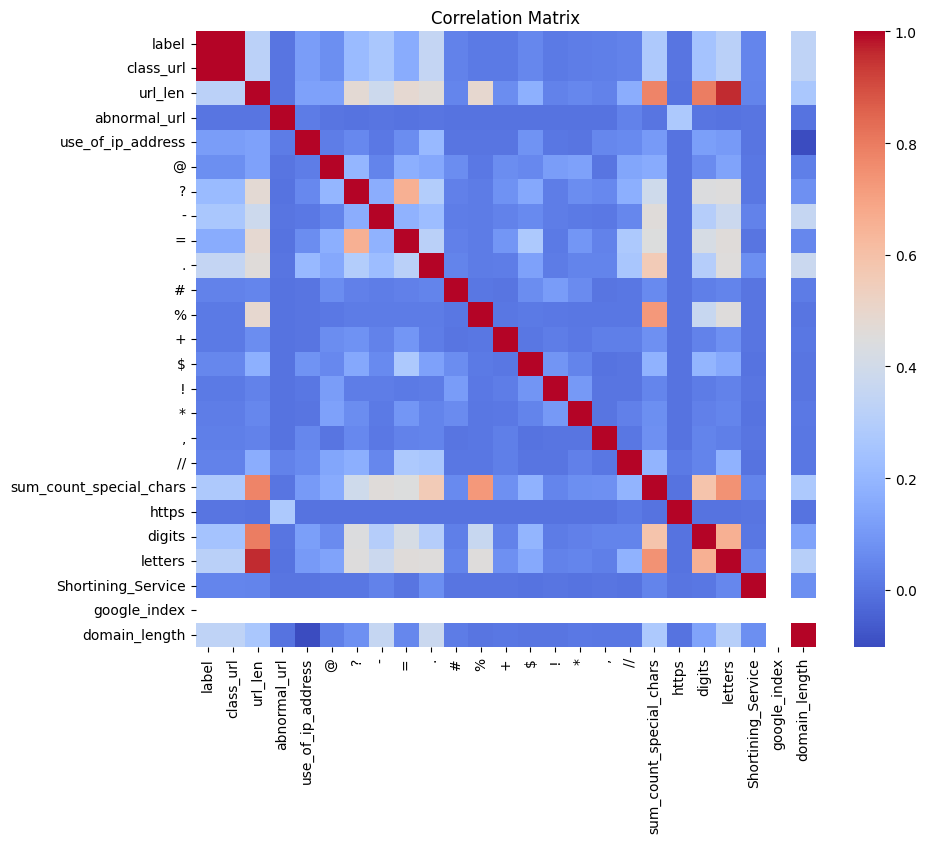

In [74]:
# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()